In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [86]:
def show_original_images(pixels):
    fig, axes = plt.subplots(6,10, figsize =(11,7), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()    
    

In [87]:
def show_eigenfaces(pca):
    fig, axes = plt.subplots(3,8, figsize=(9,4), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64,64), cmap='gray')
        ax.set_title("PC" + str(i+1))
    plt.show()

In [88]:
df=pd.read_csv('C:/Users/Shubham Shah/Desktop/Projects/FaceRecognition/Dataset/face_data.csv')

In [89]:
targets =df['target']
pixels = df.drop(["target"], axis=1)


(400, 4096)


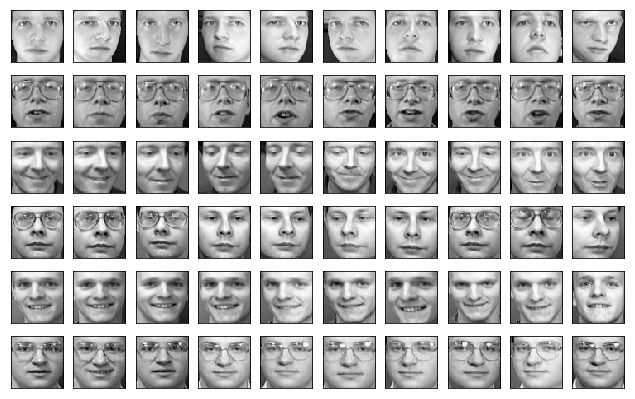

In [90]:
print(np.array(pixels).shape)
show_original_images(pixels)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)

Text(0, 0.5, 'cumulative explained variance')

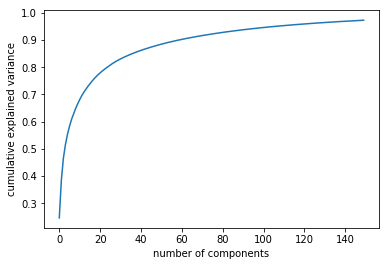

In [92]:
pca = PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

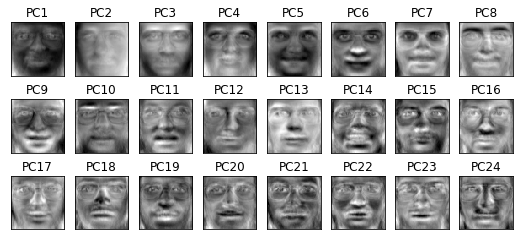

In [93]:
show_eigenfaces(pca)

In [94]:
Xtrain_pca = pca.transform(x_train)


In [95]:
clf=SVC(kernel='rbf', C=1000, gamma=0.001)
clf=clf.fit(Xtrain_pca, y_train)

In [96]:
t0=time()
Xtest_pca = pca.transform(x_test)
y_pred=clf.predict(Xtest_pca)

print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

done in 0.040s
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      0.67      0.80         3
          16       1.00      1.00      1.00         7
          17